## Лабораторная работа 1

Pandas

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

1. Считать в pandas DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу, встроенный датасет sklearn. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [176]:
import pandas as pd
import numpy as np
from IPython.display import display
from tabulate import tabulate
import matplotlib.pyplot as plt

In [142]:
# Считывание датасета
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
# Получение типов колонок 1 вариант
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
# Получение типов колонок 2 вариант
pd.DataFrame([df.columns, df.dtypes], index=['Column Name', 'Column Type'])

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
Column Name,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Column Type,object,object,int64,object,object,object,int64,int64,object,object,...,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


### Описание датасета
#### Атрибуты для наборов данных student-mat.csv (курс математики) и student-por.csv (курс португальского языка):

school - школа ученика (бинарный: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

sex - пол студента (бинарный: 'F' - женский or 'M' - мужской)

age - возраст студента (значения: от 15 до 22)

address -тип домашнего адреса студента (бинарный: 'U' - городской or 'R' - сельский)

famsize - размер семьи (бинарный: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - статус совместного проживания родителей (бинарный: 'T' - живут вместе или 'A' - раздельно)

Medu - образование матери  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Fedu - образование отца  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Mjob - работа матери (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

Fjob - работа отца (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

reason - причина выбора данной школы (номинальный: близость к  'дому', школьная 'репутация', предпочтение 'курс' или 'другое')

guardian - опекун студента (номинальный: 'мать', 'отец' или 'другое')

traveltime - время в пути от дома до школы (значения: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 ч, или 4 - >1 ч)

studytime - еженедельное учебное время (значения: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - >10 часов)

failures - количество неудач в прошлом классе (значения: n если 1 <= n <3, иначе 4)

schoolsup - дополнительная образовательная поддержка (бинарный: да или нет)

famsup - педагогическая поддержка семьи (бинарный: да или нет)

paid - дополнительные платные занятия в рамках предмета курса (Математика или Португальский язык) (бинарный: да или нет)

activities - внеклассные мероприятия (бинарный: да или нет)

nursery - посещеал ли детский сад (бинарный: да или нет)

higher - хочет получить высшее образование (бинарный: да или нет)

internet - Доступ в Интернет дома (бинарный: да или нет)

romantic - с романтическими отношениями (бинарный: да или нет)

famrel - качество семейных отношений (значения: от 1 - очень плохо до 5 - отлично)

freetime - свободное время после школы (значения: от 1 - очень низкий до  5 - очень высокий)

goout - прогулки с друзьями (значения: от 1 - очень низкий до  5 - очень высокий)

Dalc - употребление алкоголя в течение рабочего дня (значения: от 1 - очень низкий до  5 - очень высокий)

Walc - употребление алкоголя в выходные дни (значения: от 1 - очень низкий до  5 - очень высокий)

health - текущее состояние здоровья (значения: от 1 - очень плохо до 5 - очень хорошо)

absences - количество пропусков занятий (значения: от 0 до 93)


### Оценки, связанные с предматами: математика или португальский язык

G1 - оценка за первый период (значения: от 0 до 20)

G2 - оценка за второй период (значения: от 0 до 20)

G3 - финальная оценка (значения: от 0 до 20, выходной показатель)


2 Выполните с датафреймом следующие операции (многие операции можно совершить не одним способом, используйте все известные вам способы, поищите/придумайте новые способы):

2.1 вывод таблицы

In [10]:
# 1-й способ
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [8]:
# 2-й способ
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [33]:
# 3-й способ
print(tabulate(df, headers = 'keys', tablefmt = 'pipe'))
'''Стили на выбор:
- plain
- simple
- github
- grid
- fancy_grid
- pipe
- orgtbl
- jira
- presto
- pretty
- psql
- rst
- mediawiki
- moinmoin
- youtrack
- html
- latex
- latex_raw
- latex_booktabs
- textile'''

|     | school   | sex   |   age | address   | famsize   | Pstatus   |   Medu |   Fedu | Mjob     | Fjob     | reason     | guardian   |   traveltime |   studytime |   failures | schoolsup   | famsup   | paid   | activities   | nursery   | higher   | internet   | romantic   |   famrel |   freetime |   goout |   Dalc |   Walc |   health |   absences |   G1 |   G2 |   G3 |
|----:|:---------|:------|------:|:----------|:----------|:----------|-------:|-------:|:---------|:---------|:-----------|:-----------|-------------:|------------:|-----------:|:------------|:---------|:-------|:-------------|:----------|:---------|:-----------|:-----------|---------:|-----------:|--------:|-------:|-------:|---------:|-----------:|-----:|-----:|-----:|
|   0 | GP       | F     |    18 | U         | GT3       | A         |      4 |      4 | at_home  | teacher  | course     | mother     |            2 |           2 |          0 | yes         | no       | no     | no           | yes       | yes      | n

In [34]:
# 4-й способ
df.style

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


2.2 вывод первых n элементов таблицы

In [37]:
# 1-й способ
n = 66
df.head(n)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,GP,F,16,U,GT3,T,1,1,services,services,...,5,5,5,5,5,5,6,10,8,11
62,GP,F,16,U,LE3,T,1,2,other,services,...,4,4,3,1,1,1,4,8,10,9
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
64,GP,F,15,U,LE3,T,4,3,services,services,...,4,4,4,2,4,2,0,10,10,10


In [42]:
# 2-й способ
data = df[0:n]
print(data)

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
..    ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
61     GP   F   16       U     GT3       T     1     1  services  services   
62     GP   F   16       U     LE3       T     1     2     other  services   
63     GP   F   16       U     GT3       T     4     3   teacher    health   
64     GP   F   15       U     LE3       T     4     3  services  services   
65     GP   F   16       U     LE3       T     4     3   teacher  services   

    ... famrel freetime  goout  Dalc  Walc health absences  G1 

2.3 вывод последних n элементов таблицы

In [43]:
# 1-й способ
df.tail(n)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
329,GP,F,17,U,GT3,T,4,4,teacher,teacher,...,4,3,3,1,2,4,4,14,14,14
330,GP,M,18,U,LE3,T,2,2,other,other,...,4,5,5,2,4,5,2,9,8,8
331,GP,F,17,R,GT3,T,2,4,at_home,other,...,4,4,3,1,1,5,7,12,14,14
332,GP,F,18,U,GT3,T,3,3,services,services,...,5,3,4,1,1,4,0,7,0,0
333,GP,F,18,U,LE3,T,2,2,other,other,...,4,3,3,1,1,2,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [47]:
# 2-й способ
data = df[-1 - n+1:]
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
329     GP   F   17       U     GT3       T     4     4   teacher   teacher   
330     GP   M   18       U     LE3       T     2     2     other     other   
331     GP   F   17       R     GT3       T     2     4   at_home     other   
332     GP   F   18       U     GT3       T     3     3  services  services   
333     GP   F   18       U     LE3       T     2     2     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

2.4 .describe() - Статистика по данным

In [52]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


2.5 считывание значения конкретной ячейки (с конкретным индексом из конкретной колонки) всеми известными вам способами

In [81]:
# 1-й способ
df.loc[n][6]

4

In [84]:
# 2-й способ
df.loc[66, 'Medu'] # или df.loc[n, 'Medu']

4

In [85]:
# 3-й способ
df.iloc[n, 6]

4

In [87]:
# 4-й способ
df['Medu'].values[n]

4

2.6 фильтрация строк по диапазону индекса

In [89]:
# 1-й способ
df[6:66]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4,14,14,14


In [94]:
# 2-й способ
df.loc[6:66]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,GP,F,16,U,LE3,T,1,2,other,services,...,4,4,3,1,1,1,4,8,10,9
63,GP,F,16,U,GT3,T,4,3,teacher,health,...,3,4,4,2,4,4,2,10,9,9
64,GP,F,15,U,LE3,T,4,3,services,services,...,4,4,4,2,4,2,0,10,10,10
65,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,15


In [91]:
# 3-й способ
df[6:66:6]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16,6,5,5
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8
30,GP,M,15,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0,9,11,12
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,4,3,3,2,2,5,2,15,15,14
54,GP,F,15,U,LE3,A,3,3,other,other,...,5,3,4,4,4,1,6,10,13,13
60,GP,F,16,R,GT3,T,4,4,health,teacher,...,2,4,4,2,3,4,6,10,11,11


In [92]:
# 4-й способ
df.loc[6:66:6]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
18,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16,6,5,5
24,GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,9,8
30,GP,M,15,U,GT3,T,4,4,health,services,...,5,4,2,3,4,5,0,9,11,12
36,GP,M,15,U,LE3,T,4,3,teacher,services,...,5,4,3,1,1,4,2,15,16,18
42,GP,M,15,U,GT3,T,4,4,services,teacher,...,4,3,3,1,1,5,2,19,18,18
48,GP,M,15,U,GT3,T,4,2,teacher,other,...,4,3,3,2,2,5,2,15,15,14
54,GP,F,15,U,LE3,A,3,3,other,other,...,5,3,4,4,4,1,6,10,13,13
60,GP,F,16,R,GT3,T,4,4,health,teacher,...,2,4,4,2,3,4,6,10,11,11


In [93]:
# 5-й способ
df.take(slice(6, 66))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,0,10,8,9
11,GP,F,15,U,GT3,T,2,1,services,other,...,5,2,2,1,1,4,4,10,12,12
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,2,10,10,11
14,GP,M,15,U,GT3,A,2,2,other,other,...,4,5,2,1,1,3,0,14,16,16
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,4,14,14,14


2.7 фильтрация набора данных по какому-либо условию

In [103]:
# 1-й способ
df.loc[df['school'] == 'GP'].head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [105]:
# 2-й способ
df['school'].str.contains('GP').head(10)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: school, dtype: bool

In [109]:
# 3-й способ
df.query('school == "GP"').head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


2.8. работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan

In [131]:
nan_df = df.copy()


In [136]:
nan_df = nan_df.replace(66, np.NAN)
nan_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,NaN,4.0,1.0,1.0,NaN,NaN,5.0,NaN,NaN
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,5.0,NaN,NaN,1.0,1.0,NaN,4.0,5.0,5.0,NaN
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,4.0,NaN,NaN,NaN,NaN,NaN,10.0,7.0,8.0,10.0
3,GP,F,15,U,GT3,T,4.0,NaN,health,services,...,NaN,NaN,NaN,1.0,1.0,5.0,NaN,15.0,14.0,15.0
4,GP,F,16,U,GT3,T,NaN,NaN,other,other,...,4.0,NaN,NaN,1.0,NaN,5.0,4.0,NaN,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,NaN,NaN,services,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17,U,LE3,T,NaN,1.0,services,services,...,NaN,4.0,5.0,NaN,4.0,NaN,NaN,14.0,16.0,16.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,10.0,8.0,7.0
393,MS,M,18,R,LE3,T,NaN,NaN,services,other,...,4.0,4.0,1.0,NaN,4.0,5.0,NaN,11.0,12.0,10.0


In [137]:
nan_df.fillna(66).head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,66.0,4.0,1.0,1.0,66.0,66.0,5.0,66.0,66.0


In [127]:
nan_df.loc[0:20:2]= np.NaN
nan_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,NaN,NaN,1.0,1.0,NaN,4.0,5.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,NaN,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2.0,2.0,services,services,...,5.0,5.0,4.0,4.0,5.0,4.0,11.0,9.0,9.0,9.0
391,MS,M,17.0,U,LE3,T,NaN,1.0,services,services,...,2.0,4.0,5.0,NaN,4.0,2.0,NaN,14.0,16.0,16.0
392,MS,M,21.0,R,GT3,T,1.0,1.0,other,other,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,10.0,8.0,7.0
393,MS,M,18.0,R,LE3,T,NaN,2.0,services,other,...,4.0,4.0,1.0,NaN,4.0,5.0,0.0,11.0,12.0,10.0


In [130]:
# Заменяем пропуски и проверяем пропущенные значения
replace_nan_df = nan_df['age'].mean() 
data_test=nan_df.fillna(value=replace_nan_df)
data_test.isna().sum()
#replace_nan_df

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [129]:
# удаляем пропуски
clear_nan_df = nan_df['age'].dropna()
clear_nan_df

1      17.0
3      15.0
5      16.0
7      17.0
9      15.0
       ... 
390    20.0
391    17.0
392    21.0
393    18.0
394    19.0
Name: age, Length: 384, dtype: float64

In [114]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

2.9. создание нового поля вычисленного на основе значений других полей:

2.9.1 через выражение на базе имеющихся колонок

In [145]:
df['new_col'] = df['age'] + 5
df.head(1).T

,0
school,GP
sex,F
age,18
address,U
famsize,GT3
Pstatus,A
Medu,4
Fedu,4
Mjob,at_home
Fjob,teacher


2.9.2 через DataFrame.apply

In [151]:
df['Mjob Copy'] = df.apply(lambda x: x['Mjob'].replace('at_', '') , axis=1)
df.head(1).T

,0
school,GP
sex,F
age,18
address,U
famsize,GT3
Pstatus,A
Medu,4
Fedu,4
Mjob,at_home
Fjob,teacher


2.9.3 через Series.apply

In [152]:
df['Value Mjob Copy'] = df['Mjob Copy'].apply(lambda x: "Y" if x == "home" else "N")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9,9,9,25,services,N
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,3,14,16,16,22,services,N
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,26,other,N
393,MS,M,18,R,LE3,T,3,2,services,other,...,3,4,5,0,11,12,10,23,services,N


2.10 сортировка по какому-либо из полей

In [155]:
df.sort_values(by='school').head(66)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
238,GP,F,17,R,GT3,T,2,1,at_home,services,...,1,1,3,2,13,11,11,22,home,Y
237,GP,F,16,U,GT3,T,2,1,other,other,...,1,1,5,20,13,12,12,21,other,N
236,GP,M,17,U,LE3,T,2,2,other,other,...,5,5,4,4,14,13,13,22,other,N
235,GP,M,16,U,GT3,T,3,2,at_home,other,...,1,3,2,10,11,9,10,21,home,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,GP,M,17,U,GT3,T,3,3,other,other,...,1,4,4,4,6,5,6,22,other,N
185,GP,M,17,U,GT3,T,3,3,services,services,...,2,3,4,12,12,12,11,22,services,N
261,GP,M,18,U,GT3,T,4,3,teacher,other,...,1,1,3,2,8,8,8,23,teacher,N
196,GP,M,17,U,GT3,T,4,4,services,teacher,...,1,2,5,4,17,15,16,22,services,N


2.11 вычислить несколько статистик по колонкам (используйте встроенные агрегатные функции — любые на выбор)

In [158]:
df['age'].min(), df['Medu'].max(), df['Fedu'].max(), df['health'].min(), df['G3'].std()

(15, 4, 4, 1, 4.5814426109978434)

2.12 .value_counts()

In [159]:
df.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob     Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  new_col  Mjob Copy  Value Mjob Copy
GP      F    15   R        GT3      T        1     1     at_home  other     home        mother    2           4          1         yes        yes     yes   yes         yes      yes     yes       no        3       1         2      1     1     1       2         7   10  10  20       home       Y                  1
        M    16   U        LE3      T        2     2     other    other     reputation  mother    2           2          0         no         yes     no    yes         yes      yes     yes       no        5       4         4      2     4     5       0         13  13  12  21       other      N                  1
                                                   1     other    

2.13 Вывод уникальных значений колонки через .unique()

In [160]:
df['absences'].unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17],
      dtype=int64)

2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [161]:
new_df = df.copy()
new_df.index = new_df['absences']
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
absences,,,,,,,,,,,,,,,,,,,,,
6,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
4,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
10,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
2,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9,9,9,25,services,N
3,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,3,14,16,16,22,services,N
3,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,26,other,N


3. Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам. Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.

In [162]:
df.groupby('age').count()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
age,,,,,,,,,,,,,,,,,,,,,
15,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
16,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104
17,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
18,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
19,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
20,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


4. Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям). Какую информацию о данных вы получили, выполнив данную операцию? Запишите ответ в комментариях.

In [165]:
df.groupby('age').mean().pivot(columns='G1', values='G1')

G1,6.000000,10.000000,10.250000,10.719512,10.897959,10.942308,11.231707,13.666667
age,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,11.256098,NaN
16,NaN,NaN,NaN,NaN,NaN,11.028846,NaN,NaN
17,NaN,NaN,NaN,NaN,10.27551,NaN,NaN,NaN
18,NaN,NaN,NaN,9.54878,NaN,NaN,NaN,NaN
19,NaN,NaN,8.208333,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
21,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
22,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.9.) либо (7)). Перед тем как выполнять задание сформулируйте вопрос, на который собираетесь получить ответ с помощью сводной таблицы. Запишите этот вопрос в комментариях. Какую информацию о данных вы в результате получили? https://pbpython.com/pandas-pivot-table-explained.html

In [166]:
# Посмотрть есть ли снижение финальной оценки в последнее время?
pd.pivot_table(df, index='G3')

,Dalc,Fedu,G1,G2,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,new_col,studytime,traveltime
G3,,,,,,,,,,,,,,,,
0,1.342105,2.289474,7.526316,4.657895,2.315789,1.921053,0.000000,17.078947,0.921053,3.842105,3.131579,3.210526,3.605263,22.078947,1.973684,1.605263
4,2.000000,3.000000,6.000000,6.000000,4.000000,4.000000,22.000000,17.000000,2.000000,3.000000,4.000000,5.000000,1.000000,22.000000,2.000000,1.000000
5,2.285714,2.571429,5.857143,5.428571,2.714286,3.428571,11.428571,16.714286,1.000000,3.714286,4.142857,4.000000,3.714286,21.714286,1.428571,1.142857
6,1.133333,2.266667,6.800000,6.133333,2.733333,1.666667,8.066667,16.333333,0.000000,4.000000,3.066667,3.266667,3.666667,21.333333,1.933333,1.533333
7,1.555556,2.000000,7.222222,7.333333,2.777778,2.777778,6.777778,17.000000,1.444444,4.111111,3.444444,3.333333,4.000000,22.000000,1.888889,1.666667
8,1.656250,2.375000,7.750000,8.062500,2.531250,2.750000,9.718750,17.218750,0.625000,3.906250,3.281250,3.656250,3.656250,22.218750,1.937500,1.500000
9,1.750000,2.500000,9.321429,8.928571,2.714286,2.357143,10.142857,17.178571,0.464286,3.857143,3.214286,3.250000,3.821429,22.178571,2.071429,1.357143
10,1.535714,2.250000,9.410714,9.732143,2.535714,2.750000,4.857143,16.625000,0.357143,4.125000,3.178571,3.035714,3.303571,21.625000,1.946429,1.678571
11,1.446809,2.659574,11.000000,10.914894,2.680851,2.148936,7.510638,16.617021,0.106383,3.851064,3.148936,2.978723,3.744681,21.617021,2.148936,1.361702


6. Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile)

In [167]:
np.quantile(df['G2'].fillna(0), 0.6)

12.0

7. Посчитать гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

(array([28.,  0.,  6., 21., 50., 86., 53., 50., 18., 17.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

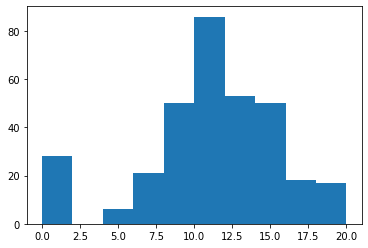

In [170]:
plt.hist(data['G3'])

8. Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / readexcel, read*, через pivot_table, через groupby или иными способами.

In [180]:
a=df.groupby(['age','G3']).aggregate(sum)
a

Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
age G3                                                                         
15  0     18    18          13         15         5      22        16     15   
    5      1     1           1          2         2       3         3      4   
    6     12    10           6          7         0      16        14     12   
    7      7     6           3          4         3       8         8      8   
    8     12    15           7         13         2      21        13     15   
...      ...   ...         ...        ...       ...     ...       ...    ...   
20  9      2     2           1          2         2       5         5      4   
    15     4     2           2          3         2       5         4      3   
    18     3     2           1          1         0       5         5      3   
21  7      1     1           1          1         3       5         5      3   
22  8      3     1           1          1         3       5         4      5   

        Dalc  Walc  health  absences  G1  G2  new_col  
age G3                                                 
15  0      7     8      25         0  53  16      120  
    5      2     4       5         2   8   6       20  
    6      4     4      17        44  30  27       80  
    7      2     5       6         8  12  16       40  
    8      6     9      18        20  43  43      100  
...      ...   ...     ...       ...  ..  ..      ...  
20  9      4     5       4        11   9   9       25  
    15     1     1       3         4  15  14       25  
    18     1     1       5         0  17  18       25  
21  7      3     3       3         3  10   8       26  
22  8      5     5       1        16   6   8       27  

[76 rows x 15 columns]

9. Переставить местами уровни индекса

In [182]:
a.swaplevel()

,,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,new_col
G3,age,,,,,,,,,,,,,,,
0,15,18,18,13,15,5,22,16,15,7,8,25,0,53,16,120
5,15,1,1,1,2,2,3,3,4,2,4,5,2,8,6,20
6,15,12,10,6,7,0,16,14,12,4,4,17,44,30,27,80
7,15,7,6,3,4,3,8,8,8,2,5,6,8,12,16,40
8,15,12,15,7,13,2,21,13,15,6,9,18,20,43,43,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,25
15,20,4,2,2,3,2,5,4,3,1,1,3,4,15,14,25
18,20,3,2,1,1,0,5,5,3,1,1,5,0,17,18,25


10. Транспонировать таблицу (или создать новую другую) с MultiIndex

In [185]:
a.T.head()

age         15                                   ... 19               20     \
G3          0  5   6  7   8  9   10  11  12  13  ... 9  10  11 12  13 9  15   
Medu        18  1  12  7  12  7  28  29  22  16  ...  7  1  12  3   9  2  4   
Fedu        18  1  10  6  15  7  17  32  23  15  ...  7  1  11  3   6  2  2   
traveltime  13  1   6  3   7  3  17  12   9   8  ...  5  1   6  1   6  1  2   
studytime   15  2   7  4  13  6  25  24  14   9  ...  7  2  12  2  10  2  3   
failures     5  2   0  3   2  0  10   0   0   0  ...  7  1   4  1   4  2  2   

age           21 22  
G3         18 7  8   
Medu        3  1  3  
Fedu        2  1  1  
traveltime  1  1  1  
studytime   1  1  1  
failures    0  3  3  

[5 rows x 76 columns]

11. Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой)

In [186]:
a.swaplevel().sort_index().head()

Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
G3 age                                                                         
0  15     18    18          13         15         5      22        16     15   
   16     18    21          11          9         8      28        22     28   
   17     16    14          13         16         8      32        26     21   
   18     25    22          17         26         8      45        38     42   
   19     11    12           7          9         6      19        17     16   

        Dalc  Walc  health  absences  G1  G2  new_col  
G3 age                                                 
0  15      7     8      25         0  53  16      120  
   16     10    13      27         0  44  25      147  
   17     11    17      29         0  61  42      176  
   18     16    24      37         0  91  66      276  
   19      7    11      19         0  37  28      120

12. Продемонстировать работу .merge

In [189]:
# по строкам и столбцам в указанном диапазоне
df_a = df.iloc[:6, 0:66]
df_a


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,10,15,15,15,21,services,N


In [190]:
df_b = df.iloc[:6, 6:66]
df_b

,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,4,4,at_home,teacher,course,mother,2,2,0,yes,...,1,1,3,6,5,6,6,23,home,Y
1,1,1,at_home,other,course,father,1,2,0,no,...,1,1,3,4,5,5,6,22,home,Y
2,1,1,at_home,other,other,mother,1,2,3,yes,...,2,3,3,10,7,8,10,20,home,Y
3,4,2,health,services,home,mother,1,3,0,no,...,1,1,5,2,15,14,15,20,health,N
4,3,3,other,other,home,father,1,2,0,no,...,1,2,5,4,6,10,10,21,other,N
5,4,3,services,other,reputation,mother,1,2,0,no,...,1,2,5,10,15,15,15,21,services,N


In [191]:
df_merge=df_a.merge(df_b)
df_merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,10,15,15,15,21,services,N


13. Продемонстрировать работу с .concat или append

In [192]:
df_append=df_a.append(df_b)
df_append

C:\Users\rudinskaya\AppData\Local\Temp\ipykernel_6224\2171841563.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append=df_a.append(df_b)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,1,2,5,10,15,15,15,21,services,N
0,NaN,NaN,NaN,NaN,NaN,NaN,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,NaN,NaN,NaN,NaN,NaN,NaN,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,NaN,NaN,NaN,NaN,NaN,NaN,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N


In [193]:
pd.concat([df_a, df_b], axis=0, ignore_index=True)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,new_col,Mjob Copy,Value Mjob Copy
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,21,other,N
5,GP,M,16.0,U,LE3,T,4,3,services,other,...,1,2,5,10,15,15,15,21,services,N
6,NaN,NaN,NaN,NaN,NaN,NaN,4,4,at_home,teacher,...,1,1,3,6,5,6,6,23,home,Y
7,NaN,NaN,NaN,NaN,NaN,NaN,1,1,at_home,other,...,1,1,3,4,5,5,6,22,home,Y
8,NaN,NaN,NaN,NaN,NaN,NaN,1,1,at_home,other,...,2,3,3,10,7,8,10,20,home,Y
9,NaN,NaN,NaN,NaN,NaN,NaN,4,2,health,services,...,1,1,5,2,15,14,15,20,health,N


14. Проитерировать dataframe построчно .iterrows(). Выполните что-то имеющее смысл внутри цикла

In [194]:
for i, (index, row) in enumerate(df.iterrows()):
    if row['Mjob'] == 'at_home':
        print(f'at_home {i}th row')

at_home 0th row
at_home 1th row
at_home 2th row
at_home 39th row
at_home 79th row
at_home 86th row
at_home 95th row
at_home 112th row
at_home 120th row
at_home 127th row
at_home 131th row
at_home 134th row
at_home 136th row
at_home 143th row
at_home 147th row
at_home 151th row
at_home 155th row
at_home 157th row
at_home 158th row
at_home 160th row
at_home 163th row
at_home 173th row
at_home 189th row
at_home 191th row
at_home 192th row
at_home 205th row
at_home 208th row
at_home 218th row
at_home 219th row
at_home 220th row
at_home 221th row
at_home 228th row
at_home 235th row
at_home 238th row
at_home 251th row
at_home 264th row
at_home 273th row
at_home 274th row
at_home 282th row
at_home 286th row
at_home 309th row
at_home 311th row
at_home 314th row
at_home 318th row
at_home 324th row
at_home 331th row
at_home 334th row
at_home 343th row
at_home 344th row
at_home 352th row
at_home 359th row
at_home 360th row
at_home 361th row
at_home 363th row
at_home 365th row
at_home 368th row
at